# EJERCICIOS

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, BatchNormalization,Normalization,Dropout
from keras.initializers import HeNormal,lecun_normal
from keras.activations import swish, selu

2025-02-05 15:31:29.359153: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 15:31:29.366234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-05 15:31:29.374631: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-05 15:31:29.377232: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 15:31:29.383907: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Verifica si TensorFlow detecta la GPU
if tf.config.list_physical_devices('GPU'):
    print("¡GPU encontrada!")
    print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
else:
    print("¡GPU no encontrada!")

¡GPU encontrada!
Num GPUs Available:  1


I0000 00:00:1738765891.958686    7382 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738765891.984146    7382 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738765891.984353    7382 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## EJERCICIO 1

Practica cómo entrenar una red neuronal profunda con el conjunto de datos de imágenes CIFAR10


### A
El conjunto de datos está compuesto por 60.000 imágenes en color de 32 x 32 píxe­les (50.000 para el entrenamiento, 5.000 para la validación y 5.000 para las pruebas) con 10 clases. Puedes cargarlo con tf.keras.datasets.cifar10.load_data(). Muestra una de la imagenes

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


In [4]:
# Fusionar todos los datos para dividir posteriormente
x_total = np.concatenate((x_train, x_test))
y_total = np.concatenate((y_train, y_test))

# Dividir el conjunto completo en 50,000 para entrenamiento y 10,000 para validación + test
x_train, x_temp, y_train, y_temp = train_test_split(x_total, y_total, test_size=10000, random_state=42)

# Dividir los 10,000 restantes en 5,000 para validación y 5,000 para test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=5000, random_state=42)

# Imprimir las formas resultantes
print("Forma de x_train:", x_train.shape)
print("Forma de x_val:", x_val.shape)
print("Forma de x_test:", x_test.shape)

Forma de x_train: (50000, 32, 32, 3)
Forma de x_val: (5000, 32, 32, 3)
Forma de x_test: (5000, 32, 32, 3)


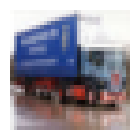

In [5]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(x_train[0])
plt.axis('off')
plt.tight_layout()
plt.show()

### B
Crea una RNP con 20 capas ocultas de 100 neuronas cada una (son demasiadas,
pero esa es la gracia del ejercicio). 

Utiliza la inicialización He y la función de activa­ción Swish. 

Antes de las 20 capas tendras que añadir una capa Input y una capa Flatten y despúes una capa de de salida.

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)

In [7]:
model = Sequential()
model.add(Input(shape=(32, 32,3)))
model.add(Flatten())
for _ in range(20):
    model.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model.add(Dense(10, activation="softmax"))

I0000 00:00:1738765910.407520    7382 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738765910.407742    7382 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738765910.407816    7382 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738765910.459688    7382 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

### C
Elige una tasa de aprendizaje adecuada para la optimización Nadam.

Para probar los diferentes modelos haz un bucle (después de cada entrenamiento evalua X_train y X_valid y guarda en un diccionario para "Red neuronal normal")

Ejemplo:


[{

    'Red neuronal normal': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X

    }
    
}] 

In [ ]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]
dicc=[]

mejor_acc_val=0
mejor_modelo=None
    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[idx])
    

    
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history=model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history.history['sparse_categorical_accuracy'][-1]
    val_acc = history.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo = model
    i+=1

Epoch 1/30


I0000 00:00:1738765977.311143    7494 service.cc:146] XLA service 0x7f3940002300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738765977.311181    7494 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-02-05 15:32:57.445083: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-02-05 15:32:57.670103: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90100


 104/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 40.6270 - sparse_categorical_accuracy: 0.1025

I0000 00:00:1738765978.395477    7494 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 7.7537 - sparse_categorical_accuracy: 0.1453 - val_loss: 2.0194 - val_sparse_categorical_accuracy: 0.2574
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.9932 - sparse_categorical_accuracy: 0.2631 - val_loss: 1.8934 - val_sparse_categorical_accuracy: 0.3174
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8806 - sparse_categorical_accuracy: 0.3109 - val_loss: 1.8164 - val_sparse_categorical_accuracy: 0.3338
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.8095 - sparse_categorical_accuracy: 0.3389 - val_loss: 1.8141 - val_sparse_categorical_accuracy: 0.3394
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7576 - sparse_categorical_accuracy: 0.3641 - val_loss: 1.7436 - val_sparse_categorical_accuracy: 0.3698
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7204 - sparse_categorical_accuracy: 0.3781 - val_loss: 1.6984 - val_sparse_categorical_accuracy: 0.3820
Epo

In [9]:
mejor_lr=mejor_modelo.optimizer.learning_rate.numpy()
print(mejor_lr)
print(mejor_acc_val)

0.007
0.4634000062942505


In [13]:
dicc.append({
    'Red neuronal normal': {

        'Tasa de aprendizaje': mejor_lr,

        'Entrenamiento sparse categorical accuracy': mejor_acc_train,

        'Validación sparse categorical accuracy': mejor_acc_val,

        'Tiempo total (s)': mejor_tiempo

    }
})


In [14]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}


### D
 Una vez elegida la tasa de aprendizaje entrena el modelo usando la detención temprana (ahora que tienes detención temprana aumenta el número de epochs).

 Añade los resultados al diccionario anterior, hay que añadir:

[{

    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': X,

        'Entrenamiento sparse categorical accuracy': X,

        'Validación sparse categorical accuracy': X,

        'Tiempo total (s)': X,

        'Mejor época': X

    }
    
}] 

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)

optimizer = tf.keras.optimizers.Nadam(learning_rate=mejor_lr)
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)



model_opti = Sequential()
model_opti.add(Input(shape=(32, 32,3)))
model_opti.add(Flatten())
for _ in range(20):
    model_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_opti.add(Dense(10, activation="softmax"))



model_opti.compile(loss="sparse_categorical_crossentropy",
            optimizer=optimizer,
            metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history=model_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

train_acc= history.history['sparse_categorical_accuracy'][-1]
val_acc = history.history['val_sparse_categorical_accuracy'][-1]

   
end_time = time.time()

training_time = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 91.9958 - sparse_categorical_accuracy: 0.1661 - val_loss: 2.3119 - val_sparse_categorical_accuracy: 0.0966
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3100 - sparse_categorical_accuracy: 0.0958 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.0964
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3078 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.3032 - val_sparse_categorical_accuracy: 0.0964
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3073 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.3034 - val_sparse_categorical_accuracy: 0.0964
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3067 - sparse_categorical_accuracy: 0.0977 - val_loss: 2.3034 - val_sparse_categorical_accuracy: 0.0964
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3060 - sparse_categorical_accuracy: 0.0976 - val_loss: 2.3039 - val_sparse_categorical_ac

In [17]:
train_loss, train_SC_accuracy = model_opti.evaluate(x_train, y_train)
print("Pérdida:", train_loss, "Precisión:", train_SC_accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - loss: 2.3035 - sparse_categorical_accuracy: 0.1002
Pérdida: 2.303586006164551 Precisión: 0.10013999789953232


In [18]:
val_loss, val_SC_accuracy = model_opti.evaluate(x_val, y_val)
print("Pérdida:", val_loss, "Precisión:", val_SC_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0983
Pérdida: 2.3032162189483643 Precisión: 0.09640000015497208


In [19]:
test_loss, test_SC_accuracy = model_opti.evaluate(x_test, y_test)
print("Pérdida:", test_loss, "Precisión:", test_SC_accuracy)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 2.3021 - sparse_categorical_accuracy: 0.1072
Pérdida: 2.3024890422821045 Precisión: 0.10220000147819519


In [20]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1


dicc.append({
    'Red neuronal normal con detención temprana': {

        'Tasa de aprendizaje': mejor_lr,

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy,

        'Validación sparse categorical accuracy': history.history['val_sparse_categorical_accuracy'][-11],

        'Tiempo total (s)': training_time,

        'Mejor época': best_epoch

    }
})



In [21]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 34.60612463951111, 'Mejor época': 3}}


### E
Ahora, prueba a añadir normalización de lotes y repite C y D con esta nueva red.

In [22]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_lotes = Sequential()
modelo_lotes.add(Input(shape=(32, 32,3)))
modelo_lotes.add(Flatten())

for _ in range(20):
    modelo_lotes.add(BatchNormalization())
    modelo_lotes.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
modelo_lotes.add(Dense(10, activation="softmax"))

In [23]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]

mejor_acc_val=0
mejor_modelo=None
    
i=0
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[idx])
    

    
    modelo_lotes.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history_lotes=modelo_lotes.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history_lotes.history['sparse_categorical_accuracy'][-1]
    val_acc = history_lotes.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo_lotes = modelo_lotes
    i+=1

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 2.6205 - sparse_categorical_accuracy: 0.1063 - val_loss: 2.6052 - val_sparse_categorical_accuracy: 0.1354
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.3304 - sparse_categorical_accuracy: 0.1356 - val_loss: 2.3331 - val_sparse_categorical_accuracy: 0.1830
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.1543 - sparse_categorical_accuracy: 0.2039 - val_loss: 2.0891 - val_sparse_categorical_accuracy: 0.2512
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0152 - sparse_categorical_accuracy: 0.2611 - val_loss: 1.9376 - val_sparse_categorical_accuracy: 0.3014
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.9082 - sparse_categorical_accuracy: 0.3043 - val_loss: 1.8283 - val_sparse_categorical_accuracy: 0.3474
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8250 - sparse_categorical_accuracy: 0.3411 - val_loss: 1.7720 - val_sparse_categorical_accuracy

In [24]:
mejor_lr_lotes=mejor_modelo_lotes.optimizer.learning_rate.numpy()
print(mejor_lr_lotes)
print(mejor_acc_val)

0.007
0.47099998593330383


In [25]:
dicc.append({
    'Red neuronal por lotes': {

        'Tasa de aprendizaje': mejor_lr_lotes,

        'Entrenamiento sparse categorical accuracy': mejor_acc_train,

        'Validación sparse categorical accuracy': mejor_acc_val,

        'Tiempo total (s)': mejor_tiempo

    }
})

In [26]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 34.60612463951111, 'Mejor época': 3}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.7213600277900696, 'Validación sparse categorical accuracy': 0.47099998593330383, 'Tiempo total (s)': 124.65188360214233}}


In [27]:
optimizer_lotes = tf.keras.optimizers.Nadam(learning_rate=float(mejor_lr_lotes))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

tf.keras.backend.clear_session()
tf.random.set_seed(17)

model_lotes_opti = Sequential()
model_lotes_opti.add(Input(shape=(32, 32,3)))
model_lotes_opti.add(Flatten())
for _ in range(20):
    model_lotes_opti.add(BatchNormalization())
    model_lotes_opti.add(Dense(100, activation=swish, kernel_initializer=HeNormal()))
model_lotes_opti.add(Dense(10, activation="softmax"))



model_lotes_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_lotes,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_lotes=model_lotes_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_lotes = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - loss: 2.1604 - sparse_categorical_accuracy: 0.2146 - val_loss: 1.9926 - val_sparse_categorical_accuracy: 0.3054
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8982 - sparse_categorical_accuracy: 0.3065 - val_loss: 1.9300 - val_sparse_categorical_accuracy: 0.3182
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.8419 - sparse_categorical_accuracy: 0.3357 - val_loss: 1.8085 - val_sparse_categorical_accuracy: 0.3608
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.7827 - sparse_categorical_accuracy: 0.3656 - val_loss: 1.8167 - val_sparse_categorical_accuracy: 0.3736
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7508 - sparse_categorical_accuracy: 0.3793 - val_loss: 1.8873 - val_sparse_categorical_accuracy: 0.3796
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.7006 - sparse_categorical_accuracy: 0.3975 - val_loss: 1.7673 - val_sparse_categorical_ac

In [28]:
train_loss_lotes, train_SC_accuracy_lotes = model_lotes_opti.evaluate(x_train, y_train)
print("Pérdida:", train_loss_lotes, "Precisión:", train_SC_accuracy_lotes)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6997 - sparse_categorical_accuracy: 0.4059
Pérdida: 1.7035771608352661 Precisión: 0.40738001465797424


In [29]:
val_loss_lotes, val_SC_accuracy_lotes = model_lotes_opti.evaluate(x_val, y_val)
print("Pérdida:", val_loss_lotes, "Precisión:", val_SC_accuracy_lotes)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7836 - sparse_categorical_accuracy: 0.3849
Pérdida: 1.767255425453186 Precisión: 0.3953999876976013


In [30]:
test_loss_lotes, test_SC_accuracy_lotes = model_lotes_opti.evaluate(x_val, y_val)
print("Pérdida:", test_loss_lotes, "Precisión:", test_SC_accuracy_lotes)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7836 - sparse_categorical_accuracy: 0.3849
Pérdida: 1.767255425453186 Precisión: 0.3953999876976013


In [31]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

dicc.append({
    'Red neuronal por lotes con detención temprana': {

        'Tasa de aprendizaje': float(mejor_lr_lotes),

        'Entrenamiento sparse categorical accuracy': val_SC_accuracy_lotes,

        'Validación sparse categorical accuracy': val_SC_accuracy_lotes,

        'Tiempo total (s)': training_time_lotes,

        'Mejor época': best_epoch

    }
})

In [32]:
for entrada in dicc:
    print(entrada)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 34.60612463951111, 'Mejor época': 3}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.7213600277900696, 'Validación sparse categorical accuracy': 0.47099998593330383, 'Tiempo total (s)': 124.65188360214233}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.3953999876976013, 'Validación sparse categorical accuracy': 0.3953999876976013, 'Tiempo total (s)': 72.68648767471313, 'Mejor época': 6}}


### F
Prueba a sustituir la normalización de lotes por la activación SELU y haz los ajustes necesarios para garantizar que la red se autonormaliza (es decir, tienes que estandarizar los datos antes de empezar).

En este caso prueba a estandarizar manualmentes, es decir restando la media y dividiendo por la desviación standard.

Usa la inicialización LeCun normal.

Repite C y D con esta nueva red.

In [33]:
x_train_norm = (x_train - np.average(x_train)) / (np.std(x_train))
x_val_norm = (x_val - np.average(x_val)) / (np.std(x_val))
x_test_norm = (x_test - np.average(x_test)) / (np.std(x_test))

y_train_norm = (y_train - np.average(y_train)) / (np.std(y_train))
y_val_norm = (y_val - np.average(y_val)) / (np.std(y_val))
y_test_norm = (y_test - np.average(y_test)) / (np.std(y_test))

In [34]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


modelo_selu = Sequential()
modelo_selu.add(Input(shape=(32, 32,3)))
modelo_selu.add(Flatten())
for _ in range(20):
    modelo_selu.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
modelo_selu.add(Dense(10, activation="softmax"))
    

In [35]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]

mejor_acc_val=0
mejor_modelo=None
    
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[idx])
    

    
    modelo_selu.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history_selu=modelo_selu.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history_selu.history['sparse_categorical_accuracy'][-1]
    val_acc = history_selu.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo_selu = modelo_selu

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.0704 - sparse_categorical_accuracy: 0.2468 - val_loss: 1.8668 - val_sparse_categorical_accuracy: 0.3166
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7856 - sparse_categorical_accuracy: 0.3462 - val_loss: 1.7070 - val_sparse_categorical_accuracy: 0.3862
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6980 - sparse_categorical_accuracy: 0.3823 - val_loss: 1.6727 - val_sparse_categorical_accuracy: 0.3974
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6424 - sparse_categorical_accuracy: 0.4043 - val_loss: 1.6570 - val_sparse_categorical_accuracy: 0.4068
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6036 - sparse_categorical_accuracy: 0.4199 - val_loss: 1.6255 - val_sparse_categorical_accuracy: 0.4208
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.5677 - sparse_categorical_accuracy: 0.4325 - val_loss: 1.6300 - val_sparse_categorical_accuracy:

In [36]:
mejor_lr_selu=mejor_modelo_selu.optimizer.learning_rate.numpy()
print(mejor_lr_selu)
print(mejor_acc_val)

0.007
0.4805999994277954


In [37]:
dicc.append({
    'Red neuronal selu': {

        'Tasa de aprendizaje': mejor_lr_selu,

        'Entrenamiento sparse categorical accuracy': mejor_acc_train,

        'Validación sparse categorical accuracy': mejor_acc_val,

        'Tiempo total (s)': mejor_tiempo

    }
})

In [38]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 34.60612463951111, 'Mejor época': 3}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.7213600277900696, 'Validación sparse categorical accuracy': 0.47099998593330383, 'Tiempo total (s)': 124.65188360214233}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.3953999876976013, 'Validación sparse categorical accuracy': 0.3953999876976013, 'Tiempo total (s)': 72.68648767471313, 'Mejor época': 6}}
{'Red

In [39]:
optimizer_selu = tf.keras.optimizers.Nadam(learning_rate=float(mejor_lr_selu))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_selu_opti = Sequential()
model_selu_opti.add(Input(shape=(32, 32,3)))
model_selu_opti.add(Flatten())
for _ in range(20):
    model_selu_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_selu_opti.add(Dense(10, activation="softmax"))

model_selu_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_selu,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_selu=model_selu_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_selu = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.8292 - sparse_categorical_accuracy: 0.1468 - val_loss: 2.1524 - val_sparse_categorical_accuracy: 0.1584
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10862.9717 - sparse_categorical_accuracy: 0.1714 - val_loss: 10.0029 - val_sparse_categorical_accuracy: 0.0978
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3.8380 - sparse_categorical_accuracy: 0.1008 - val_loss: 2.3059 - val_sparse_categorical_accuracy: 0.0964
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3080 - sparse_categorical_accuracy: 0.1013 - val_loss: 2.3065 - val_sparse_categorical_accuracy: 0.0964
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3092 - sparse_categorical_accuracy: 0.1005 - val_loss: 2.3071 - val_sparse_categorical_accuracy: 0.0964
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3107 - sparse_categorical_accuracy: 0.0996 - val_loss: 2.3078 - val_sparse_categorica

In [40]:
train_loss_selu, train_SC_accuracy_selu = model_selu_opti.evaluate(x_train, y_train)
print("Pérdida:", train_loss_selu, "Precisión:", train_SC_accuracy_selu)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - loss: 2.1518 - sparse_categorical_accuracy: 0.1545
Pérdida: 2.152069091796875 Precisión: 0.15335999429225922


In [41]:
val_loss_selu, val_SC_accuracy_selu = model_selu_opti.evaluate(x_val, y_val)
print("Pérdida:", val_loss_selu, "Precisión:", val_SC_accuracy_selu)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 2.1443 - sparse_categorical_accuracy: 0.1670
Pérdida: 2.1524322032928467 Precisión: 0.15839999914169312


In [42]:
test_loss_selu, test_SC_accuracy_selu = model_selu_opti.evaluate(x_test, y_test)
print("Pérdida:", test_loss_selu, "Precisión:", test_SC_accuracy_selu)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 2.1390 - sparse_categorical_accuracy: 0.1558
Pérdida: 2.1455483436584473 Precisión: 0.15780000388622284


In [43]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1



dicc.append({
    'Red neuronal selu con detención temprana': {

        'Tasa de aprendizaje': mejor_lr_selu,

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy_selu,

        'Validación sparse categorical accuracy': val_SC_accuracy_selu,

        'Tiempo total (s)': training_time_selu,

        'Mejor época': best_epoch

    }
})

In [44]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 34.60612463951111, 'Mejor época': 3}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.7213600277900696, 'Validación sparse categorical accuracy': 0.47099998593330383, 'Tiempo total (s)': 124.65188360214233}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.3953999876976013, 'Validación sparse categorical accuracy': 0.3953999876976013, 'Tiempo total (s)': 72.68648767471313, 'Mejor época': 6}}
{'Red

### G
Prueba ahora a regularizar el modelo anterior añadiendo una capa dropout antes de la última capa (estandariza manualmente como en el punto anterior).

Repite C y D con esta nueva red.

In [45]:
tf.keras.backend.clear_session()
tf.random.set_seed(17)


model_dropout = Sequential()
model_dropout.add(Input(shape=(32, 32,3)))
model_dropout.add(Flatten())
for _ in range(20):
    model_dropout.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout.add(Dropout(rate=0.2))
model_dropout.add(Dense(10, activation="softmax"))
    

In [46]:
learning_rates=[1e-4,3e-4,7e-4,1e-3,3e-3,7e-3]

mejor_acc_val=0
mejor_modelo=None
    
for idx, lr in enumerate(learning_rates,start=0):
    
    optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rates[idx])
    

    
    model_dropout.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["sparse_categorical_accuracy"])
    
    start_time = time.time()

    history_dropout=model_dropout.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))
    
    end_time = time.time()

    training_time = end_time - start_time


    train_acc= history_dropout.history['sparse_categorical_accuracy'][-1]
    val_acc = history_dropout.history['val_sparse_categorical_accuracy'][-1]
    
    if val_acc > mejor_acc_val:
        mejor_acc_train=train_acc
        mejor_acc_val = val_acc
        mejor_tiempo=training_time

        mejor_modelo_dropout = model_dropout

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 2.1704 - sparse_categorical_accuracy: 0.2263 - val_loss: 1.8132 - val_sparse_categorical_accuracy: 0.3370
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8359 - sparse_categorical_accuracy: 0.3293 - val_loss: 1.7137 - val_sparse_categorical_accuracy: 0.3732
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.7408 - sparse_categorical_accuracy: 0.3673 - val_loss: 1.6749 - val_sparse_categorical_accuracy: 0.3954
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6795 - sparse_categorical_accuracy: 0.3934 - val_loss: 1.6057 - val_sparse_categorical_accuracy: 0.4290
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.6319 - sparse_categorical_accuracy: 0.4150 - val_loss: 1.5969 - val_sparse_categorical_accuracy: 0.4300
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.5975 - sparse_categorical_accuracy: 0.4263 - val_loss: 1.5774 - val_sparse_categorical_accuracy:

In [47]:
mejor_lr_dropout=mejor_modelo_dropout.optimizer.learning_rate.numpy()
print(mejor_lr_dropout)
print(mejor_acc_val)

0.007
0.4797999858856201


In [48]:
dicc.append({
    'Red neuronal dropout': {

        'Tasa de aprendizaje': mejor_lr_dropout,

        'Entrenamiento sparse categorical accuracy': mejor_acc_train,

        'Validación sparse categorical accuracy': mejor_acc_val,

        'Tiempo total (s)': mejor_tiempo

    }
})

In [49]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 34.60612463951111, 'Mejor época': 3}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.7213600277900696, 'Validación sparse categorical accuracy': 0.47099998593330383, 'Tiempo total (s)': 124.65188360214233}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.3953999876976013, 'Validación sparse categorical accuracy': 0.3953999876976013, 'Tiempo total (s)': 72.68648767471313, 'Mejor época': 6}}
{'Red

In [50]:
optimizer_dropout = tf.keras.optimizers.Nadam(learning_rate=float(mejor_lr_dropout))
    
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)

model_dropout_opti = Sequential()
model_dropout_opti.add(Input(shape=(32, 32,3)))
model_dropout_opti.add(Flatten())
for _ in range(20):
    model_dropout_opti.add(Dense(100, activation=selu, kernel_initializer=lecun_normal()))
model_dropout_opti.add(Dense(10, activation="softmax"))

model_dropout_opti.compile(loss="sparse_categorical_crossentropy",
                         optimizer=optimizer_dropout,
                         metrics=["sparse_categorical_accuracy"])

start_time = time.time()



history_dropout=model_dropout_opti.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),callbacks=early_stopping_cb)

   
end_time = time.time()

training_time_dropout = end_time - start_time

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 16.9097 - sparse_categorical_accuracy: 0.1564 - val_loss: 3.8261 - val_sparse_categorical_accuracy: 0.0978
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 945.1603 - sparse_categorical_accuracy: 0.0990 - val_loss: 2.6304 - val_sparse_categorical_accuracy: 0.0978
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3762 - sparse_categorical_accuracy: 0.0978 - val_loss: 2.6697 - val_sparse_categorical_accuracy: 0.0978
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3821 - sparse_categorical_accuracy: 0.0985 - val_loss: 2.7096 - val_sparse_categorical_accuracy: 0.0978
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.3869 - sparse_categorical_accuracy: 0.1002 - val_loss: 2.7341 - val_sparse_categorical_accuracy: 0.0978
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2.3895 - sparse_categorical_accuracy: 0.0994 - val_loss: 2.7533 - val_sparse_categorical_

In [51]:
train_loss_dropout, train_SC_accuracy_dropout = model_dropout_opti.evaluate(x_train, y_train)
print("Pérdida:", train_loss_dropout, "Precisión:", train_SC_accuracy_dropout)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step - loss: 2.4167 - sparse_categorical_accuracy: 0.1006
Pérdida: 2.416247844696045 Precisión: 0.09984000027179718


In [52]:
val_loss_dropout, val_SC_accuracy_dropout = model_dropout_opti.evaluate(x_val, y_val)
print("Pérdida:", val_loss_dropout, "Precisión:", val_SC_accuracy_dropout)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 2.3993 - sparse_categorical_accuracy: 0.1165
Pérdida: 2.4099314212799072 Precisión: 0.10719999670982361


In [53]:
test_loss_dropout, test_SC_accuracy_dropout = model_dropout_opti.evaluate(x_test, y_test)
print("Pérdida:", test_loss_dropout, "Precisión:", test_SC_accuracy_dropout)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 2.4146 - sparse_categorical_accuracy: 0.0899
Pérdida: 2.421191692352295 Precisión: 0.09440000355243683


In [54]:
best_epoch = early_stopping_cb.stopped_epoch - early_stopping_cb.patience + 1

dicc.append({
    'Red neuronal dropout con detención temprana': {

        'Tasa de aprendizaje': float(mejor_lr_dropout),

        'Entrenamiento sparse categorical accuracy': train_SC_accuracy_dropout,

        'Validación sparse categorical accuracy': val_SC_accuracy_dropout,

        'Tiempo total (s)': training_time_dropout,

        'Mejor época': best_epoch

    }
})

In [55]:
for entry in dicc:
    print(entry)

{'Red neuronal normal': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.5201200246810913, 'Validación sparse categorical accuracy': 0.4634000062942505, 'Tiempo total (s)': 64.48622798919678}}
{'Red neuronal normal con detención temprana': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.10013999789953232, 'Validación sparse categorical accuracy': 0.09640000015497208, 'Tiempo total (s)': 34.60612463951111, 'Mejor época': 3}}
{'Red neuronal por lotes': {'Tasa de aprendizaje': 0.007, 'Entrenamiento sparse categorical accuracy': 0.7213600277900696, 'Validación sparse categorical accuracy': 0.47099998593330383, 'Tiempo total (s)': 124.65188360214233}}
{'Red neuronal por lotes con detención temprana': {'Tasa de aprendizaje': 0.007000000216066837, 'Entrenamiento sparse categorical accuracy': 0.3953999876976013, 'Validación sparse categorical accuracy': 0.3953999876976013, 'Tiempo total (s)': 72.68648767471313, 'Mejor época': 6}}
{'Red